In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [413]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Посмотрим на переменные, которые содержит датасет:

0. school — аббревиатура школы, в которой учится ученик
1. sex — пол ученика ('F' - женский, 'M' - мужской)
2. age — возраст ученика (от 15 до 22)
3. address — тип адреса ученика ('U' - городской, 'R' - за городом)
4. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
5. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
6. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
7. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
9. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
11. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
12. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
13. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
14. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
15. schoolsup — дополнительная образовательная поддержка (yes или no)
16. famsup — семейная образовательная поддержка (yes или no)
17. paid — дополнительные платные занятия по математике (yes или no)
18. activities — дополнительные внеучебные занятия (yes или no)
19. nursery — посещал детский сад (yes или no)
20. studytime, granular - поле не имеет описания
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

In [414]:
#Напишем функцию которая будет выводить информацию по переданному ей столбцу, для числовых столбцлв будет так же выводиться гистограмма
def column_info(column):
    print('Информация о поле ', column)
    print(f'Количество пустых строк: {students[column].isnull().sum()}')
    print('Распределение столбца:', pd.DataFrame(students[column].value_counts()))
    print(students[column].describe())
    if students[column].dtype == 'int64' or students[column].dtype == 'float64':
        median = students[column].median()
        perc25 = students[column].quantile(0.25)
        perc75 = students[column].quantile(0.75)
        IQR = perc75 - perc25
        print(f'25-й перцентиль: {perc25}, 75-й перцентиль: {perc75}, IQR: {IQR} Границы выбросов: [{perc25 - 1.5*IQR},{perc75 + 1.5*IQR}]')
        students[column].hist(bins = 10, label = 'IQR')
        plt.legend()
    print('\n')

Рассмотрим количественные поля. Начнем с целевого поля Score

Информация о поле  score
Количество пустых строк: 6
Распределение столбца:        score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
70.0      27
45.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
85.0       6
95.0       5
100.0      1
20.0       1
count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0 Границы выбросов: [-5.0,115.0]




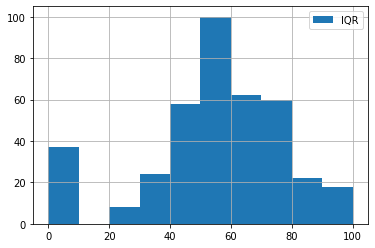

In [415]:
column_info('score')

In [416]:
#Целевевое поле содержит 6 пропусков, удалим строки содержащие пропуски
#так же в целевом поле имеются нулевые значения, удалим их тоже
students.score = students.score.apply(lambda x: x if x != 0 else None)
students.dropna(subset=['score'], inplace=True)

Информация о поле  age
Количество пустых строк: 0
Распределение столбца:     age
16   96
17   90
15   76
18   69
19   16
20    3
22    1
21    1
count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0 Границы выбросов: [13.0,21.0]




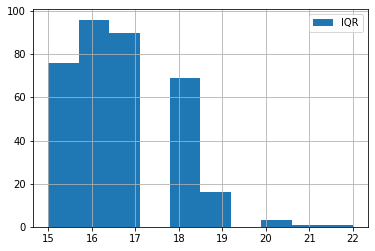

In [417]:
column_info('age')

Значений вне интервала указананого в описании поля нет

Информация о поле  Medu
Количество пустых строк: 2
Распределение столбца:      Medu
4.0   125
2.0    88
3.0    87
1.0    47
0.0     3
count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0 Границы выбросов: [-1.0,7.0]




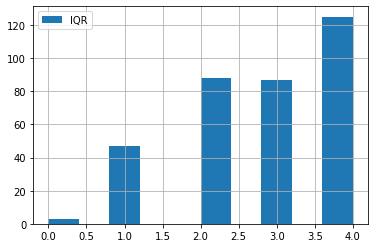

In [418]:
column_info('Medu')

Значений вне интервала указананого в описании поля нет

Информация о поле  Fedu
Количество пустых строк: 21
Распределение столбца:       Fedu
2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0 Границы выбросов: [0.5,4.5]




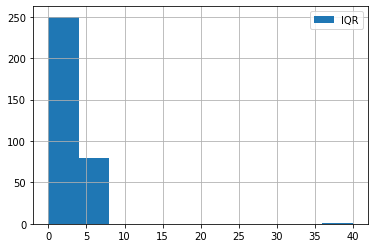

In [419]:
column_info('Fedu')

In [420]:
#В столбце с образованием отца имеется неверное значение 40, удалим его
students = students[students.Fedu != 40]

Информация о поле  traveltime
Количество пустых строк: 23
Распределение столбца:      traveltime
1.0         219
2.0          86
3.0          16
4.0           7
count    328.000000
mean       1.423780
std        0.686467
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0 Границы выбросов: [-0.5,3.5]




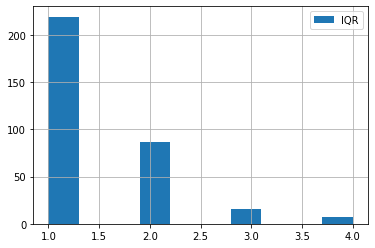

In [421]:
column_info('traveltime')

Значений вне интервала указананого в описании поля нет

Информация о поле  studytime
Количество пустых строк: 7
Распределение столбца:      studytime
2.0        173
1.0         90
3.0         57
4.0         24
count    344.000000
mean       2.043605
std        0.840564
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0 Границы выбросов: [-0.5,3.5]




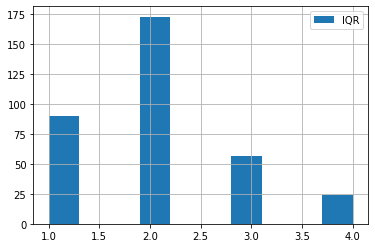

In [422]:
column_info('studytime')

Значений вне интервала указананого в описании поля нет

Информация о поле  failures
Количество пустых строк: 20
Распределение столбца:      failures
0.0       272
1.0        38
2.0        11
3.0        10
count    331.000000
mean       0.271903
std        0.668623
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0 Границы выбросов: [0.0,0.0]




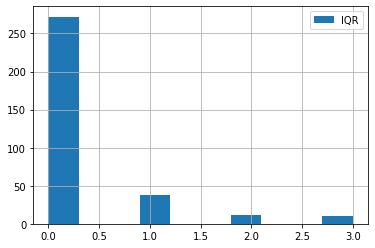

In [423]:
column_info('failures')

Значений вне интервала указананого в описании поля нет

Информация о поле  studytime, granular
Количество пустых строк: 7
Распределение столбца:        studytime, granular
-6.0                   173
-3.0                    90
-9.0                    57
-12.0                   24
count    344.000000
mean      -6.130814
std        2.521692
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64
25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0 Границы выбросов: [-10.5,1.5]




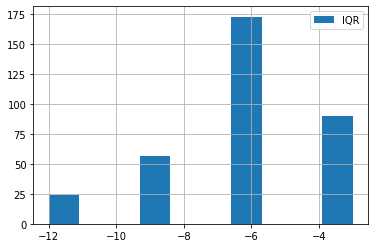

In [424]:
column_info('studytime, granular')

In [425]:
 #посмтроим матрицу корреляции
 students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.126165,-0.125368,0.105575,-0.007159,0.234929,0.007159,0.079104,0.000184,0.120363,-0.055008,0.112250,-0.131349
Medu,-0.126165,1.000000,0.611390,-0.161611,0.073196,-0.207066,-0.073196,0.001692,0.018396,0.078571,-0.037302,-0.027769,0.186914
Fedu,-0.125368,0.611390,1.000000,-0.156746,-0.015575,-0.268015,0.015575,-0.017608,-0.025592,0.048440,0.017212,0.018294,0.135042
traveltime,0.105575,-0.161611,-0.156746,1.000000,-0.110642,0.095682,0.110642,-0.032772,-0.014391,0.036795,-0.002860,-0.046731,-0.077109
studytime,-0.007159,0.073196,-0.015575,-0.110642,1.000000,-0.155347,-1.000000,0.060030,-0.124985,-0.026440,-0.086828,-0.029686,0.141828
failures,0.234929,-0.207066,-0.268015,0.095682,-0.155347,1.000000,0.155347,-0.009892,0.126166,0.125724,0.064557,0.089359,-0.289267
"studytime, granular",0.007159,-0.073196,0.015575,0.110642,-1.000000,0.155347,1.000000,-0.060030,0.124985,0.026440,0.086828,0.029686,-0.141828
famrel,0.079104,0.001692,-0.017608,-0.032772,0.060030,-0.009892,-0.060030,1.000000,0.167425,0.054490,0.095319,-0.089218,0.046323
freetime,0.000184,0.018396,-0.025592,-0.014391,-0.124985,0.126166,0.124985,0.167425,1.000000,0.293785,0.074206,0.007189,-0.011949
goout,0.120363,0.078571,0.048440,0.036795,-0.026440,0.125724,0.026440,0.054490,0.293785,1.000000,-0.009355,-0.051183,-0.182171


In [426]:
#столбцы "studytime, granular" и "studytime" скоррелированы полностью удилим столбец "studytime, granular"
students.drop(columns='studytime, granular', inplace=True)

Информация о поле  famrel
Количество пустых строк: 24
Распределение столбца:       famrel
 4.0     163
 5.0      87
 3.0      56
 2.0      14
 1.0       6
-1.0       1
count    327.000000
mean       3.938838
std        0.921417
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0 Границы выбросов: [2.5,6.5]




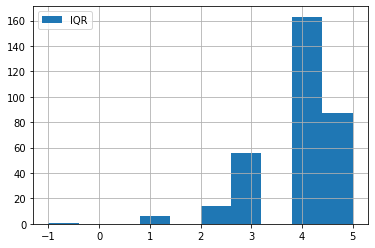

In [427]:
column_info('famrel')

In [428]:
#Имеется 1 неверное значение удалим его
students = students[students.famrel != -1.0]

Информация о поле  freetime
Количество пустых строк: 8
Распределение столбца:      freetime
3.0       132
4.0       102
2.0        57
5.0        35
1.0        16
count    342.000000
mean       3.242690
std        1.002719
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0 Границы выбросов: [1.5,5.5]




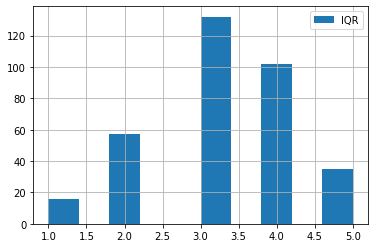

In [429]:
column_info('freetime')

Значений вне интервала указананого в описании поля нет

Информация о поле  goout
Количество пустых строк: 6
Распределение столбца:      goout
3.0    118
2.0     90
4.0     74
5.0     43
1.0     19
count    344.000000
mean       3.093023
std        1.092011
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0 Границы выбросов: [-1.0,7.0]




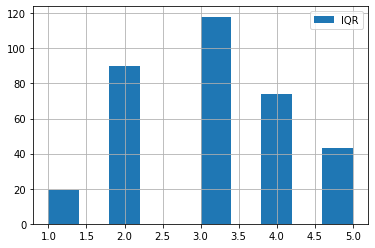

In [430]:
column_info('goout')

Значений вне интервала указананого в описании поля нет

Информация о поле  health
Количество пустых строк: 13
Распределение столбца:      health
5.0     123
3.0      81
4.0      52
1.0      45
2.0      36
count    337.000000
mean       3.510386
std        1.414438
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0 Границы выбросов: [0.0,8.0]




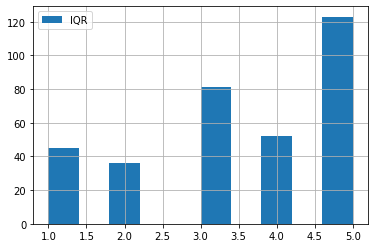

In [431]:
column_info('health')

Значений вне интервала указананого в описании поля нет

Информация о поле  absences
Количество пустых строк: 10
Распределение столбца:        absences
0.0          74
2.0          60
4.0          51
6.0          30
8.0          20
10.0         17
12.0         12
14.0         11
3.0           7
16.0          7
7.0           6
18.0          5
5.0           5
20.0          4
22.0          3
9.0           3
1.0           3
15.0          2
13.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1
count    340.000000
mean       8.085294
std       24.774292
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0 Границы выбросов: [-7.0,17.0]




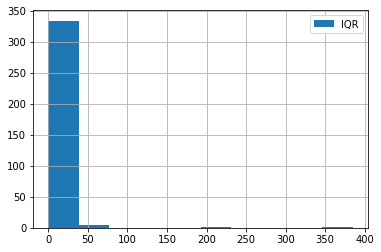

In [432]:
column_info('absences')

In [433]:
#Данные о количестве пропущенных занятий содержат выбросы, удалим их
students = students[(students.absences < 17) | (students.absences.isnull())]

Выведем информацию о всех категориальных полях

In [434]:
for column in students.columns:
    if students[column].dtypes == object:
        print(column_info(column))

Информация о поле  school
Количество пустых строк: 0
Распределение столбца:     school
GP     283
MS      39
count     322
unique      2
top        GP
freq      283
Name: school, dtype: object


None
Информация о поле  sex
Количество пустых строк: 0
Распределение столбца:    sex
F  162
M  160
count     322
unique      2
top         F
freq      162
Name: sex, dtype: object


None
Информация о поле  address
Количество пустых строк: 14
Распределение столбца:    address
U      240
R       68
count     308
unique      2
top         U
freq      240
Name: address, dtype: object


None
Информация о поле  famsize
Количество пустых строк: 21
Распределение столбца:      famsize
GT3      208
LE3       93
count     301
unique      2
top       GT3
freq      208
Name: famsize, dtype: object


None
Информация о поле  Pstatus
Количество пустых строк: 33
Распределение столбца:    Pstatus
T      261
A       28
count     289
unique      2
top         T
freq      261
Name: Pstatus, dtype: object


None
Инф

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [435]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [436]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


Колонки sex, age, address, Mjob, schoolsup имеют статически значимые различия. Перенесём их в датасет для постороения модели. Так же перенесём количественные поля.

In [437]:
stud_for_model = students.drop(columns = ['school', 'famsize', 'Pstatus', 'Fjob','reason',
            'guardian', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic'])

In [438]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 394
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         322 non-null    object 
 1   age         322 non-null    int64  
 2   address     308 non-null    object 
 3   Medu        320 non-null    float64
 4   Fedu        303 non-null    float64
 5   Mjob        307 non-null    object 
 6   traveltime  300 non-null    float64
 7   studytime   315 non-null    float64
 8   failures    305 non-null    float64
 9   schoolsup   313 non-null    object 
 10  famrel      301 non-null    float64
 11  freetime    317 non-null    float64
 12  goout       317 non-null    float64
 13  health      309 non-null    float64
 14  absences    312 non-null    float64
 15  score       322 non-null    float64
dtypes: float64(11), int64(1), object(4)
memory usage: 42.8+ KB


# Выводы

1. Из датасета были удалены строки содержащие пустые и нулевые значения в столбце с итоговой оценкой.
2. Удалена строка содержащая неверное значение в столбце с образование отца
3. Удален столбец "Studytime, granular", так он полностью коррелирует со столбцом "Studytime" и не имеет описания
4. Удалена строка содержащая неверное значение в столбце с семейными отношениями
5. Удалены строки содержащие выбросы в столбце с количеством пропущенных занятий
6. Проведён анализ категориальных полей и определены статистически значимые поля
7. Сформирован DataSet для построения модели содержащий 322 стоки и 16 столбцов

